In [ ]:
import os
from lxml import etree

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imfiles = []
lbfiles = []
dr =  '/content/drive/My Drive/CV/Project_Data/pngfiles/'
drlb = '/content/drive/My Drive/CV/Project_Data/xmlfiles/'
for file in os.listdir(dr):
    imfiles.append(file)
for file in os.listdir(drlb):
    lbfiles.append(file)
imfiles= sorted(imfiles)
lbfiles = sorted(lbfiles)

In [ ]:
imfiles

['Cars0.png',
 'Cars1.png',
 'Cars10.png',
 'Cars100.png',
 'Cars101.png',
 'Cars102.png',
 'Cars103.png',
 'Cars104.png',
 'Cars105.png',
 'Cars106.png',
 'Cars107.png',
 'Cars108.png',
 'Cars109.png',
 'Cars11.png',
 'Cars110.png',
 'Cars111.png',
 'Cars112.png',
 'Cars113.png',
 'Cars114.png',
 'Cars115.png',
 'Cars116.png',
 'Cars117.png',
 'Cars118.png',
 'Cars119.png',
 'Cars12.png',
 'Cars120.png',
 'Cars121.png',
 'Cars122.png',
 'Cars123.png',
 'Cars124.png',
 'Cars125.png',
 'Cars126.png',
 'Cars127.png',
 'Cars128.png',
 'Cars129.png',
 'Cars13.png',
 'Cars130.png',
 'Cars131.png',
 'Cars132.png',
 'Cars133.png',
 'Cars134.png',
 'Cars135.png',
 'Cars136.png',
 'Cars137.png',
 'Cars138.png',
 'Cars139.png',
 'Cars14.png',
 'Cars140.png',
 'Cars141.png',
 'Cars142.png',
 'Cars143.png',
 'Cars144.png',
 'Cars145.png',
 'Cars146.png',
 'Cars147.png',
 'Cars148.png',
 'Cars149.png',
 'Cars15.png',
 'Cars150.png',
 'Cars151.png',
 'Cars152.png',
 'Cars153.png',
 'Cars154.png',
 '

In [ ]:
images = []
dr =  '/content/drive/My Drive/CV/Project_Data/pngfiles/'
for file in imfiles:
    img = cv2.imread(f'{dr}/{file}')
    img = cv2.resize(img, (200,200))
    #print(f'{dr}/{file}')
    #print(np.array(img).shape)
    images.append(np.array(img))

In [ ]:
import pdb
labels = []
dr = '/content/drive/My Drive/CV/Project_Data/xmlfiles/'
for file in lbfiles:
    tree = etree.parse(f'{dr}/{file}')
    #pdb.set_trace()
    width = int(tree.xpath("size")[0].xpath("width")[0].text)
    #pdb.set_trace()
    height = int(tree.xpath("size")[0].xpath("height")[0].text)
    xmin = int(tree.xpath("object/bndbox")[0].xpath("xmin")[0].text)/(width/200)
    ymin = int(tree.xpath("object/bndbox")[0].xpath("ymin")[0].text)/(height/200)
    xmax = int(tree.xpath("object/bndbox")[0].xpath("xmax")[0].text)/(width/200)
    ymax = int(tree.xpath("object/bndbox")[0].xpath("ymax")[0].text)/(height/200)
    labels.append([int(xmax), int(ymax), int(xmin), int(ymin)])

In [ ]:
labels[100]

In [ ]:
plt.figure(figsize = (200,200))
for i in range(50):
    image = cv2.rectangle(images[i], (labels[i][0], labels[i][1]), (labels[i][2], labels[i][3]), (255, 0, 255))
    plt.subplot(10, 5, i+1)
    plt.axis('off')
    plt.imshow(image)

In [ ]:
images = np.asarray(images)
labels = np.asarray(labels)
images = images/255
labels = labels/255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

In [ ]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=images[0].shape))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
tmodel = model.fit(X_train, y_train, validation_data = (X_validation, y_validation), epochs=10, batch_size=32, verbose=1)

In [ ]:
model.save('cnn_vgg16.h5', overwrite=True) 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

In [ ]:
y_cnn = model.predict(X_test)

In [ ]:
plt.figure(figsize=(20,40))
for i in range(1,50) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    y = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(y[0]),int(y[1])),(int(y[2]),int(y[3])),(0, 255, 0))
    plt.imshow(image)

In [ ]:
img_test = cv2.imread('/content/drive/My Drive/CV/Project_Data/pngfiles/Cars1.png')
img_test = cv2.resize(img_test, (200,200))
img_test = img_test/255
img_test = np.reshape(img_test, (1,200,200,3))
y_test = model.predict(img_test)
y_test

array([[0.5103192 , 0.49403167, 0.2826373 , 0.38132316]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[130.1314   125.97807   72.07251   97.237404]]
(130.1314, 125.97807, 72.07251, 97.237404)
130 125 72 97
(130, 125)
(72, 97)


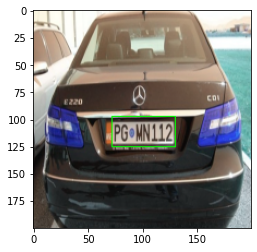

In [ ]:
y_test = y_test*255
print(y_test)

(xmax,ymax,xmin,ymin) = (y_test[0][0],y_test[0][1],y_test[0][2],y_test[0][3])
print((xmax,ymax,xmin,ymin))

image = cv2.rectangle(img_test[0],(int(y_test[0][0]),int(y_test[0][1])),(int(y_test[0][2]),int(y_test[0][3])),(0, 255, 0))

print(int(y_test[0][0]),int(y_test[0][1]),int(y_test[0][2]),int(y_test[0][3]))
#print(image)
#print(img_test[0])
print((int(y_test[0][0]),int(y_test[0][1])))
print((int(y_test[0][2]),int(y_test[0][3])))



plt.imshow(image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


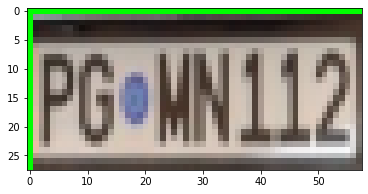

In [ ]:
##image[:,:,:]

plt.imshow(img_test[0][int(ymin):int(ymax),int(xmin):int(xmax)])

In [ ]:
plateROI=img_test[0][int(ymin):int(ymax),int(xmin):int(xmax)]

In [ ]:
plateROI = img_test[int(y_test[0][2]):int(y_test[0][0]),int(y_test[0][3]):int(y_test[0][1]),:]
plateROI
print(int(xmax), int(ymax), int(xmin), int(ymin))

83 189 40 172


In [ ]:
'''226</xmin            <ymin>125</ymin>
            <xmax>419</xmax>
            <ymax>173'''

#img_test            
#im= img_test[419:226,173:125]
#plt.imshow(im)
#plt.show()
plateROI

array([], shape=(0, 33, 200, 3), dtype=float64)

In [ ]:
from PIL import Image as im

In [ ]:
data = im.fromarray(plateROI)

TypeError: ignored

In [ ]:
import easyocr

reader = easyocr.Reader(['en'])
# detect text
text = reader.readtext(plateROI)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


error: ignored

In [ ]:
!pip install easyocr


     |████████████████████████████████| 63.6 MB 62 kB/s 
     |████████████████████████████████| 47.8 MB 41 kB/s 


In [ ]:
import pdb
#video = cv2.VideoCapture('vid.mp4')

if(video.isOpened()==False):
    print('Error Reading Video')

def getFrame(sec): 
    video.set(cv2.CAP_PROP_POS_MSEC,sec*1000) 
    hasFrames,frame = video.read() 
    #if hasFrames: 
    #cv2.imwrite("frame "+str(sec)+" sec.jpg", image)     # save frame as JPG file 
    return hasFrames,frame 
sec = 0 
frameRate = 0.5 #//it will capture image in each 0.5 second 
success = getFrame(sec) 


while success:
    #video.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    #ret,frame = video.read() 
    pdb.set_trace()
    sec = sec + frameRate 
    sec = round(sec, 2) 
    success = getFrame(sec)
   
    frame = cv2.resize(frame, (200,200))
    frame = frame/255
    frame = np.reshape(frame, (1,200,200,3))
    y_test = model.predict(frame)
    y_test
    pdb.set_trace()
    y_test = y_test*255
    print(y_test)

    (xmax,ymax,xmin,ymin) = (y_test[0][0],y_test[0][1],y_test[0][2],y_test[0][3])


    image = cv2.rectangle(frame[0],(int(y_test[0][0]),int(y_test[0][1])),(int(y_test[0][2]),int(y_test[0][3])),(0, 255, 0))


    plt.imshow(image)
    plt.show()
    pdb.set_trace()
    numberPlate_Image=image_test[0][int(ymin):int(ymax),int(xmin):int(xmax)]
    pdb.set_trace()
    numberPlate_Image= numberPlate_Image*255
    imgcon = numberPlate_Image.astype(np.uint8)
    pdb.set_trace()

    text = reader.readtext(imgcon)
    pdb.set_trace()
    plates=[]

    #plates.append(text[0][1])
    #pdb.set_trace()




 
        
         
    if hasFrames == True:
        #pdb.set_trace()
        pdb.set_trace()
        if cv2.waitKey(1) & 0xFF == ord("q"):
            pdb.set_trace()

            break
    else:
        break

video.release()
cv2.destroyAllWindows()   


In [ ]:
video = cv2.VideoCapture('Data/vid.mp4')

if(video.isOpened()==False):
    print('Error Reading Video')

while True:
    ret,frame = video.read()    
    gray_video = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plate = plat_detector.detectMultiScale(gray_video,scaleFactor=1.2,minNeighbors=5,minSize=(25,25))

    for (x,y,w,h) in plate:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0),2)
        frame[y:y+h,x:x+w] = cv2.blur(frame[y:y+h,x:x+w],ksize=(10,10))
        cv2.putText(frame,text='License Plate',org=(x-3,y-3),fontFace=cv2.FONT_HERSHEY_COMPLEX,color=(0,0,255),thickness=1,fontScale=0.6)
        
         
    if ret == True:
        cv2.imshow('Video', frame)

        if cv2.waitKey(25) & 0xFF == ord("q"):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()   